### We are going to make a forecast on sales for the company JMU SELLOS MECÁNICOS
You can visit their webpage [www.jmu.com.ve](https://www.jmu.com.ve)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import insert_row

In [2]:
# Let's read the excel file and loaded as a Dataframe
df = pd.read_excel('Relacion_de_Facturas.xlsx', header=0, parse_dates=[0], sheet_name=1)

In [3]:
# Lets check how our Dataframe looks like
df.tail()

,Fecha,Ventas
315,2022-07-29,2569.644670
316,2022-08-29,345.074468
317,2022-08-16,832.683524
318,2022-08-24,237.427617
319,2022-09-12,884.164417


In [4]:
# So we want to Forecast the last 3 months of the year 2022
# First we get the date as YY-MM
df['Fecha'] = df['Fecha'].dt.to_period('M')

In [5]:
# Second we wrangle sales in the whole months
df1= df.sort_values(['Fecha'],ascending=False).groupby(['Fecha']).sum()
df1.tail()


,Ventas
Fecha,
2022-05,83.514563
2022-06,339.750958
2022-07,4868.362046
2022-08,1415.185609
2022-09,884.164417


In [6]:
# Now the data we receive have months with 0 sales but they don't add the 0 sales
# This can get us some troubles in the moment of forecasting
# So lets find and add months with 0 sales.
print(df1.loc['2016'].shape)
print(df1.loc['2017'].shape)
print(df1.loc['2018'].shape)
print(df1.loc['2019'].shape)
print(df1.loc['2020'].shape)
print(df1.loc['2021'].shape)
print(df1.loc['2022'].shape)

(11, 1)
(12, 1)
(12, 1)
(10, 1)
(12, 1)
(11, 1)
(9, 1)


In [7]:
#We check the year 2016
print(df1.loc['2016'])

               Ventas
Fecha                
2016-02   1508.123788
2016-03   6421.873256
2016-04   3175.822794
2016-05   5567.148522
2016-06   7135.369632
2016-07   4648.964762
2016-08   9413.942060
2016-09   8172.892084
2016-10  16557.256530
2016-11   5034.021069
2016-12   2993.193918


In [8]:
# Lets create the missing month
y2016_01 = ['2016-01', 0]
y2016_01

['2016-01', 0]

In [9]:
#We check the year 2019
print(df1.loc['2019'])

              Ventas
Fecha               
2019-02   995.110217
2019-03  1052.588469
2019-04   261.369094
2019-05   949.250928
2019-06  3339.821357
2019-07  2337.334014
2019-08  4101.729419
2019-10  3359.421086
2019-11  5559.186372
2019-12  1806.258105


In [10]:
# Lets create the missing month
y2019_01 = ['2019-01', 0]
y2019_09 = ['2019-09', 0]
print(y2019_01)
print(y2019_09)

['2019-01', 0]
['2019-09', 0]


In [11]:
#We check the year 2021
print(df1.loc['2021'])

               Ventas
Fecha                
2021-01   2342.409425
2021-02   5552.807411
2021-04   1975.330231
2021-05    111.498523
2021-06   5805.254828
2021-07    728.546748
2021-08   3156.927731
2021-09  10475.010498
2021-10   2757.910628
2021-11   2225.240550
2021-12   3951.321509


In [12]:
# Lets create the missing month
y2021_03 = ['2021-03', 0]
print(y2021_03)



['2021-03', 0]


In [13]:
#Lets reset out index Fecha so we can treat it as a column
df1.reset_index(inplace=True)
df1.tail()

,Fecha,Ventas
72,2022-05,83.514563
73,2022-06,339.750958
74,2022-07,4868.362046
75,2022-08,1415.185609
76,2022-09,884.164417


In [14]:
df2 = df1.copy()

In [15]:
# We add to our folder library the function insert_row
# Credits to 'geeksforgeeks' at  https://www.geeksforgeeks.org/insert-row-at-given-position-in-pandas-dataframe/
df2 = insert_row.Insert_row(0,df2, y2016_01)
df2 = insert_row.Insert_row(36,df2, y2019_01)
df2 = insert_row.Insert_row(44,df2, y2019_09)
df2 = insert_row.Insert_row(62,df2, y2021_03)

In [16]:
#Lets confirm that we add our rows
df2.tail(20)

,Fecha,Ventas
61,2021-02,5552.807411
62,2021-03,0.000000
63,2021-04,1975.330231
64,2021-05,111.498523
65,2021-06,5805.254828
66,2021-07,728.546748
67,2021-08,3156.927731
68,2021-09,10475.010498
69,2021-10,2757.910628
70,2021-11,2225.240550


In [17]:
#We here confirm that our data type doesn't match to a datetime
df2['Fecha'].dtype

dtype('O')

In [18]:
# Lets work it on another dataframe
df3 =df2.copy().round(2)

In [19]:
#We convert to a datetime
df3['Fecha'] = df3['Fecha'].values.astype('datetime64[M]')
df3['Fecha'].dtype

dtype('<M8[ns]')

In [20]:
df3.head()

,Fecha,Ventas
0,2016-01-01,0.00
1,2016-02-01,1508.12
2,2016-03-01,6421.87
3,2016-04-01,3175.82
4,2016-05-01,5567.15


In [21]:
#Return the column Fecha to the index
df3.set_index(['Fecha'], inplace=True)
df3.head()

,Ventas
Fecha,
2016-01-01,0.00
2016-02-01,1508.12
2016-03-01,6421.87
2016-04-01,3175.82
2016-05-01,5567.15


In [22]:
print(df3.loc['2019'])

             Ventas
Fecha              
2019-01-01     0.00
2019-02-01   995.11
2019-03-01  1052.59
2019-04-01   261.37
2019-05-01   949.25
2019-06-01  3339.82
2019-07-01  2337.33
2019-08-01  4101.73
2019-09-01     0.00
2019-10-01  3359.42
2019-11-01  5559.19
2019-12-01  1806.26


In [23]:
#And lets start with our Forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX

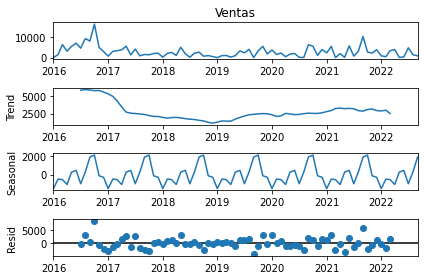

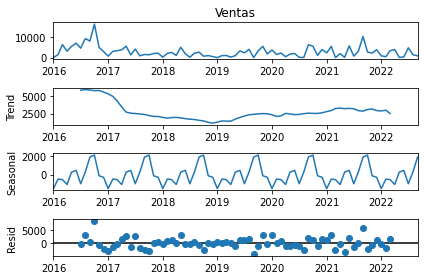

In [24]:
# Our model needs to be 'additive' if we choose 'multiplicative' wont work.
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(df3['Ventas'], model='additive')
result_a.plot()

In [25]:
#Here we pass the parameters to our model
model = SARIMAX(df3['Ventas'], order=(5,1,3), seasonal_order=(1,1,1,12))

c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
model_fit = model.fit()

c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Fecha'>

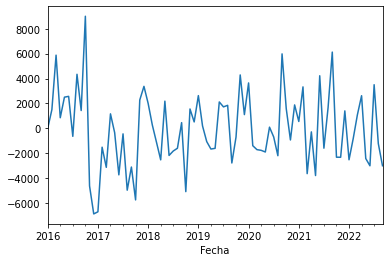

In [28]:
residuals.plot()

In [29]:
# We forecast with a round of 2 decimals 
output = model_fit.forecast().round(2)

In [30]:
output

2022-10-01    3782.94
Freq: MS, dtype: float64

### Here we have our prediction for the last 3 months of the year

In [31]:
#Lets check the last the months
model_fit.forecast(3).round(2)

2022-10-01    3782.94
2022-11-01    1823.99
2022-12-01    1216.31
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
yhat = model_fit.predict()

In [33]:
yhat.tail(9)

2022-01-01    3392.369080
2022-02-01    1281.411574
2022-03-01    2347.315665
2022-04-01    1387.252022
2022-05-01    2499.262313
2022-06-01    3337.996414
2022-07-01    1360.495061
2022-08-01    2632.772216
2022-09-01    3882.566772
Freq: MS, Name: predicted_mean, dtype: float64

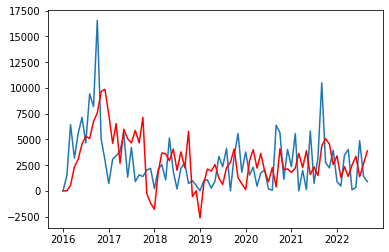

In [34]:
pyplot.plot(df3['Ventas'])
pyplot.plot(yhat, color='red')